In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\loan_prediction.csv")

## EDA

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking basic info about dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#checking nan value
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking unique in dataset
df.nunique().sort_values()

Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
Property_Area          3
Dependents             4
Loan_Amount_Term      10
LoanAmount           203
CoapplicantIncome    287
ApplicantIncome      505
Loan_ID              614
dtype: int64

## Univariate Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

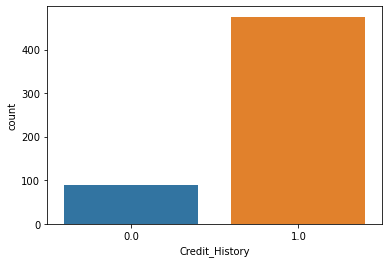

In [8]:
sns.countplot(df["Credit_History"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

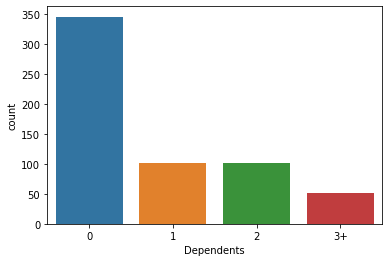

In [9]:
sns.countplot(df["Dependents"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

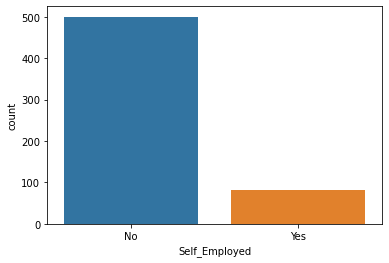

In [10]:
sns.countplot(df["Self_Employed"],data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

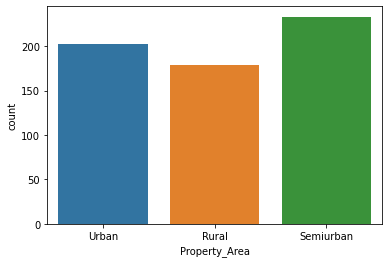

In [11]:
sns.countplot(df["Property_Area"],data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

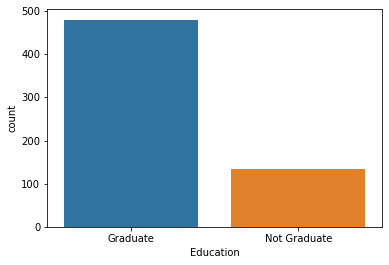

In [12]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

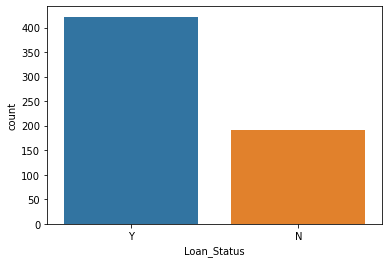

In [13]:
sns.countplot(df["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

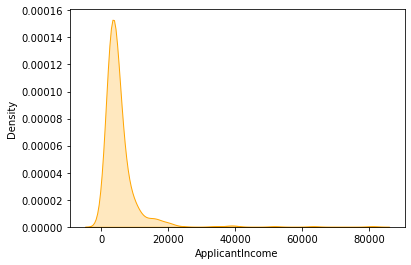

In [14]:
sns.kdeplot(df["ApplicantIncome"],fill=True,color="orange")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

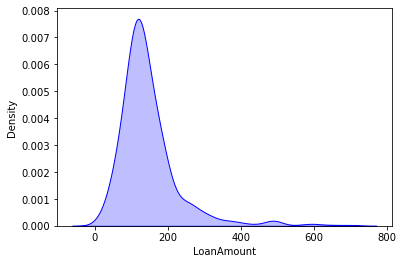

In [15]:
sns.kdeplot(df["LoanAmount"],fill=True,color="blue",data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

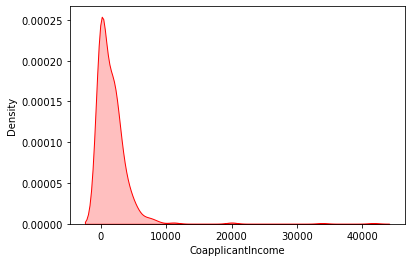

In [16]:
sns.kdeplot(df["CoapplicantIncome"],fill=True,color="red")

In [17]:
#excluding object column
cont=df.select_dtypes(exclude="object").columns
cont

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

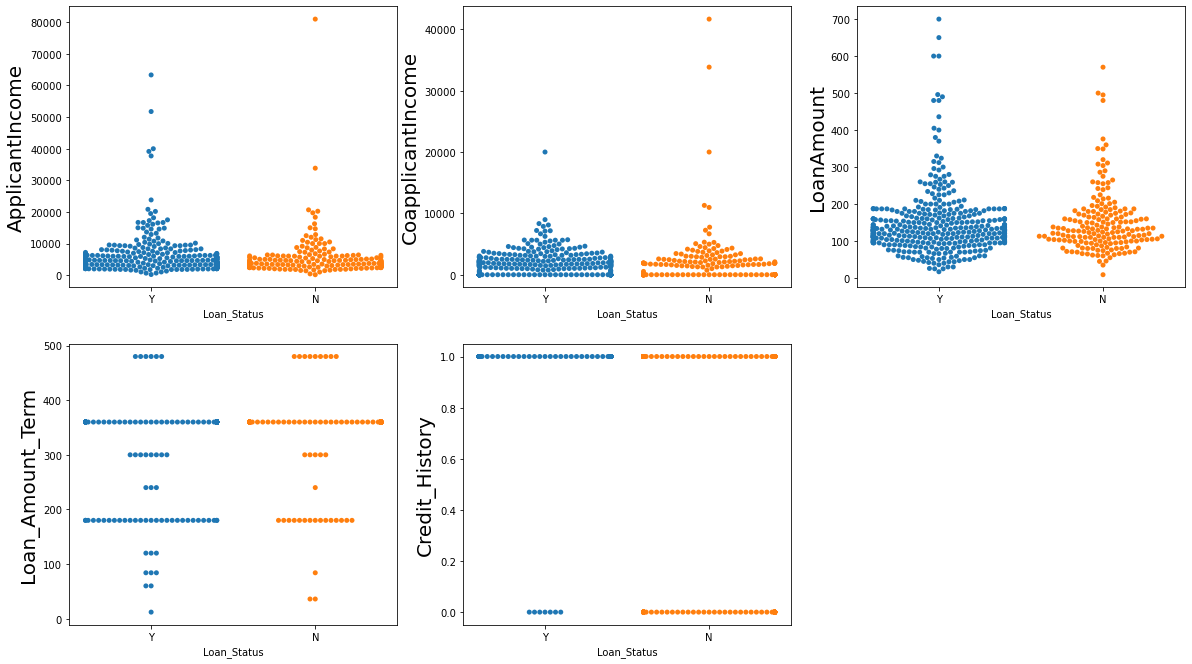

In [18]:
#bivariate analysis
plt.figure(figsize=(20,30))
plotnumber=1
for i in df[cont]:
    if plotnumber < 15:
        ax= plt.subplot(5,3,plotnumber)
        sns.swarmplot(df["Loan_Status"],df[i])
        plt.ylabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [19]:
index = np.where(df["Gender"].isna())
df.drop(df.index[index],inplace=True)

In [20]:
#filling with mode
df["Credit_History"] =df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [21]:
#filling with mode
df["Dependents"] =df["Dependents"].fillna(df["Dependents"].mode()[0])

In [22]:
#filling with mode
df["Loan_Amount_Term"] =df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [23]:
#filling with mode
df["Married"] =df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] =df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [24]:
#filling with mean
df["LoanAmount"] =df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [25]:
# for converting categorical to numerical
from sklearn.preprocessing import OrdinalEncoder
label = OrdinalEncoder()

In [26]:
df[["Gender"]]=label.fit_transform(df[["Gender"]])
df[["Married"]]=label.fit_transform(df[["Married"]])
df[["Education"]]=label.fit_transform(df[["Education"]])
df[["Property_Area"]]=label.fit_transform(df[["Property_Area"]])
df[["Loan_Status"]]=label.fit_transform(df[["Loan_Status"]])
df[["Self_Employed"]]=label.fit_transform(df[["Self_Employed"]])
df[["Dependents"]]=label.fit_transform(df[["Dependents"]])

<function matplotlib.pyplot.show(close=None, block=None)>

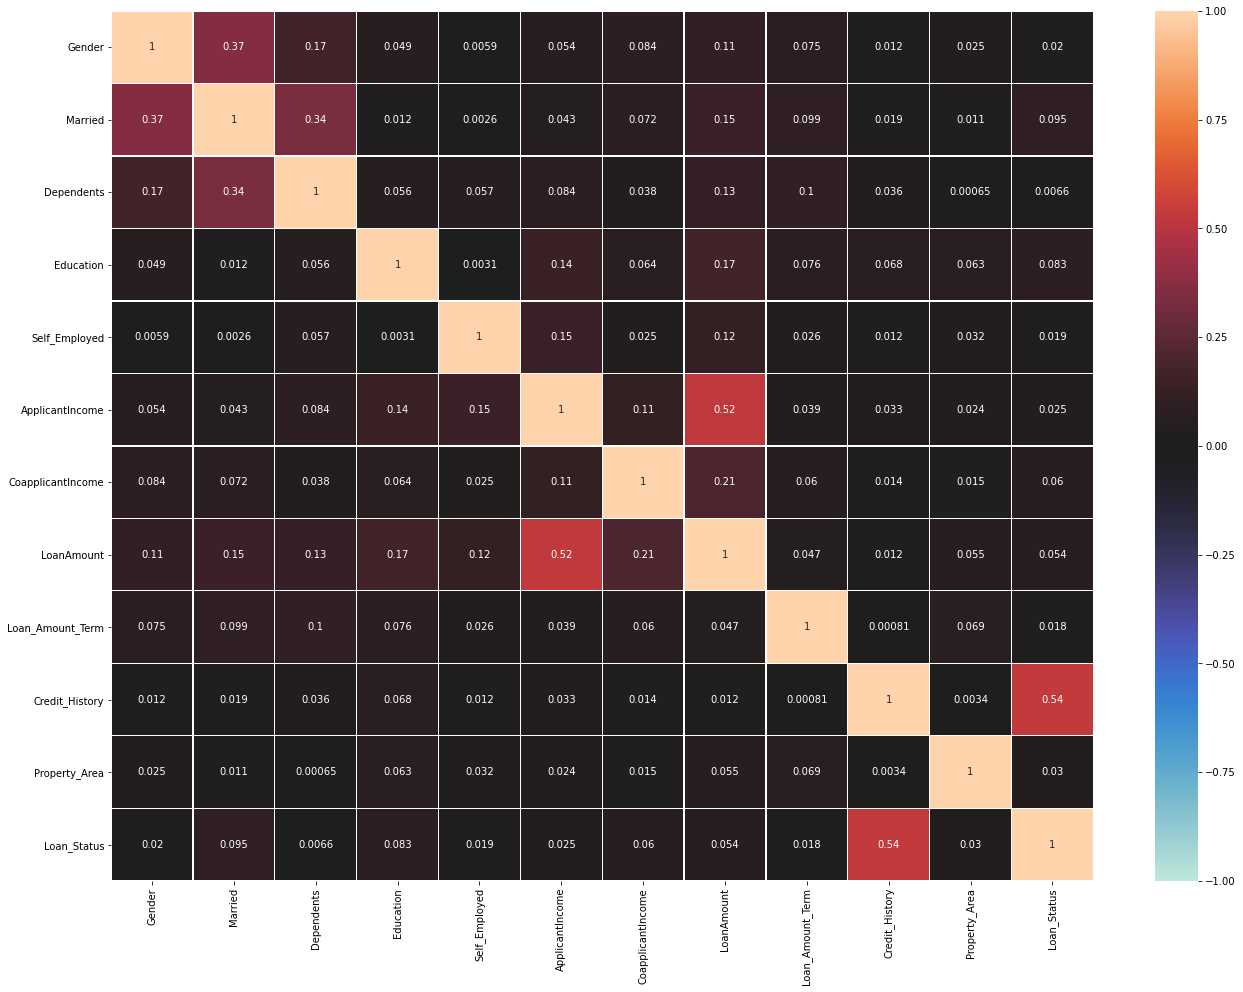

In [27]:
#multivsriste analysis
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [28]:
#droping unwanted column
df.drop("Loan_ID",axis=1,inplace=True)

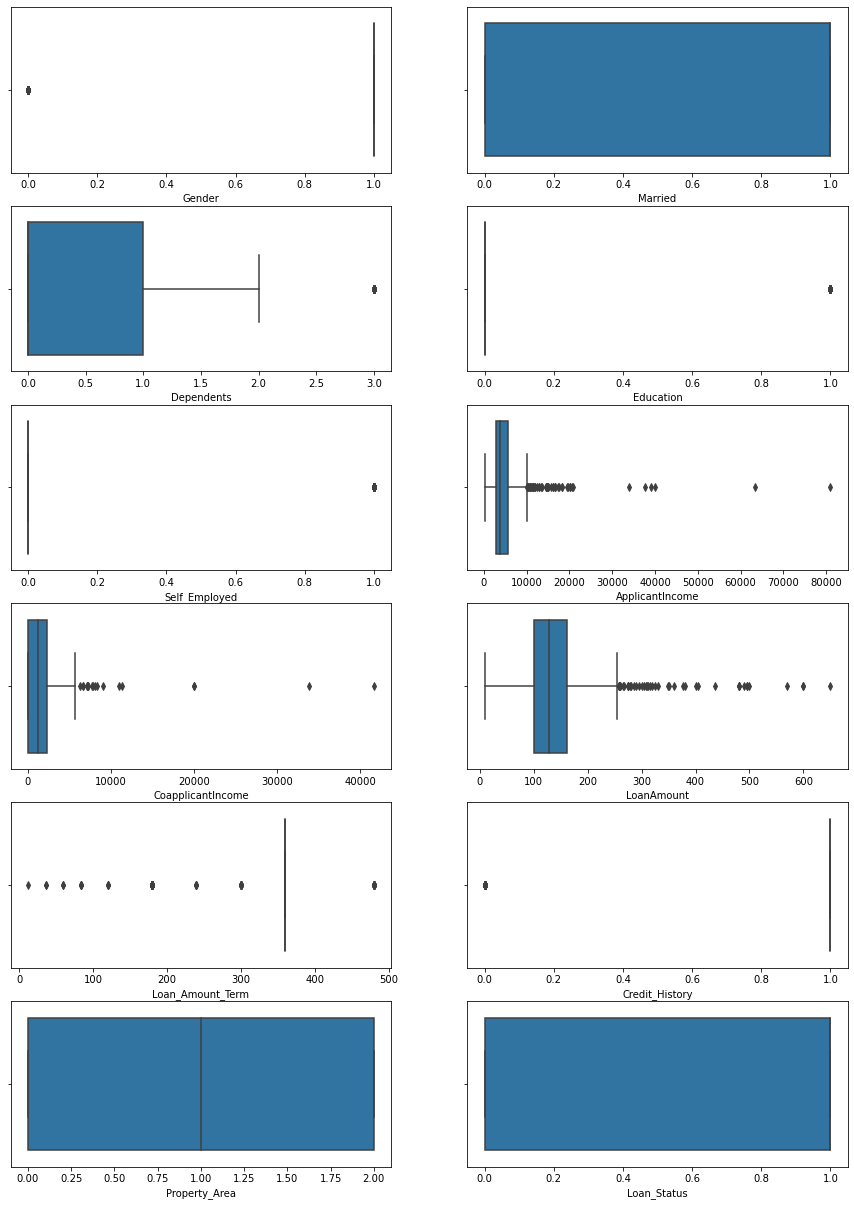

In [29]:
# for checking outliers
plotnumber = 1
plt.figure(figsize=(15,25))
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
        
plt.show()

In [30]:
#for removing outliers
from scipy.stats import zscore

In [31]:
z_score = zscore(df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]])
abs_z = np.abs(z_score)

In [32]:
filter = (abs_z < 3).all(axis=1)

In [33]:
new_df = df[filter]

In [34]:
# this is my max dataloss
new_df.shape

(578, 12)

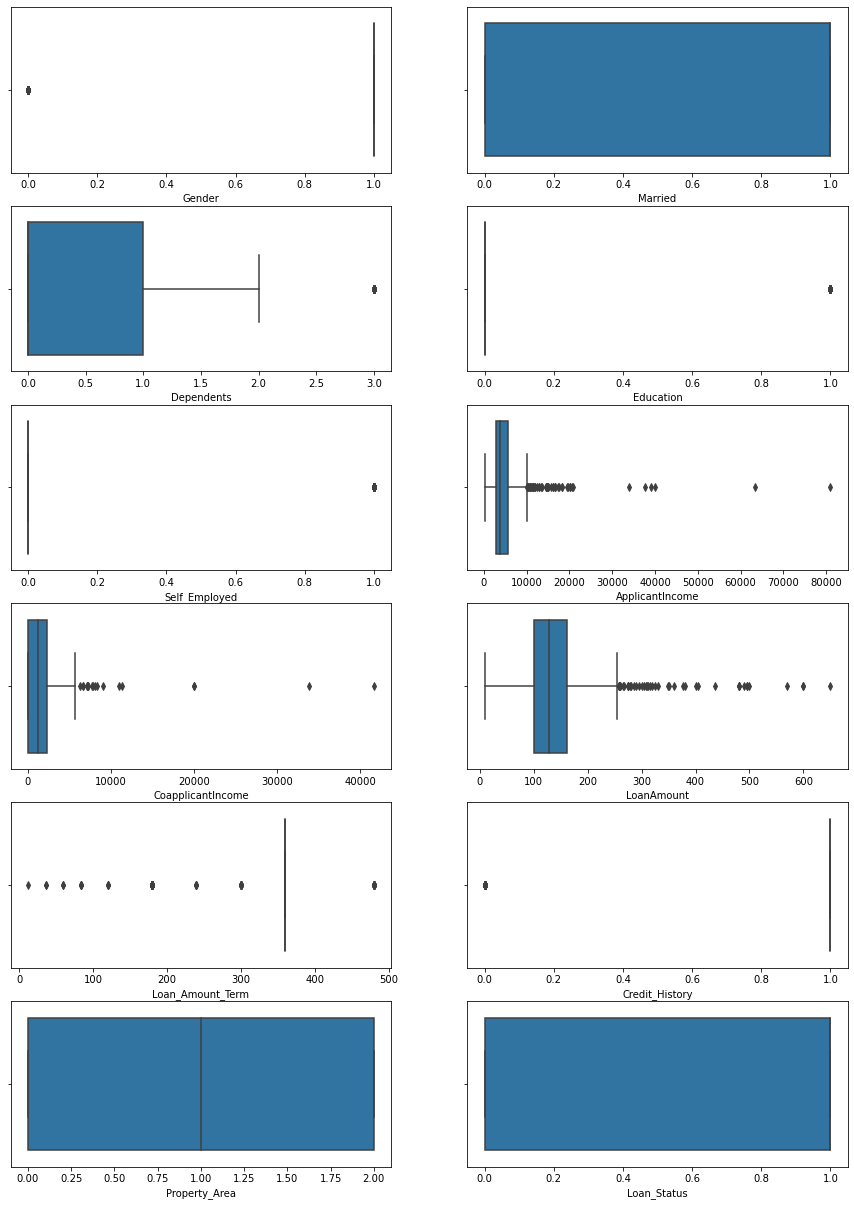

In [35]:
plotnumber = 1
plt.figure(figsize=(15,25))
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
        
plt.show()

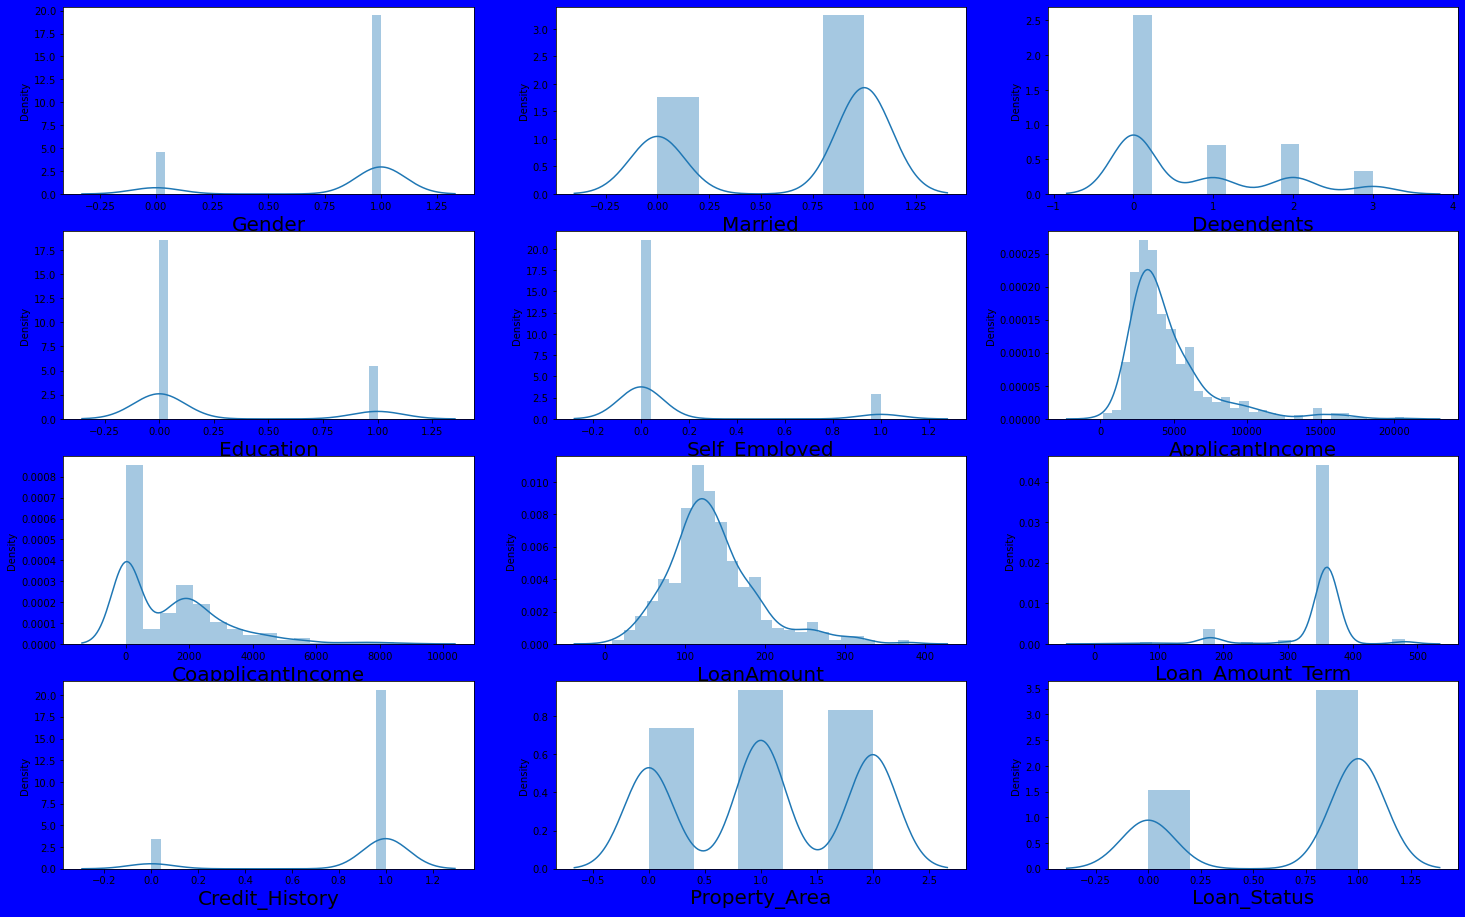

In [36]:
#for checking skewness
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [37]:
#checking skewness
new_df.skew()

Gender              -1.596365
Married             -0.625020
Dependents           1.038881
Education            1.285814
Self_Employed        2.279699
ApplicantIncome      2.177840
CoapplicantIncome    1.366342
LoanAmount           1.075471
Loan_Amount_Term    -2.439464
Credit_History      -2.037910
Property_Area       -0.067680
Loan_Status         -0.842982
dtype: float64

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
new_df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]] = pt.fit_transform(new_df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]])

In [39]:
#checking skewness
new_df.skew()

Gender              -1.596365
Married             -0.625020
Dependents           1.038881
Education            1.285814
Self_Employed        2.279699
ApplicantIncome      0.028231
CoapplicantIncome   -0.180863
LoanAmount           0.059800
Loan_Amount_Term    -2.439464
Credit_History      -2.037910
Property_Area       -0.067680
Loan_Status         -0.842982
dtype: float64

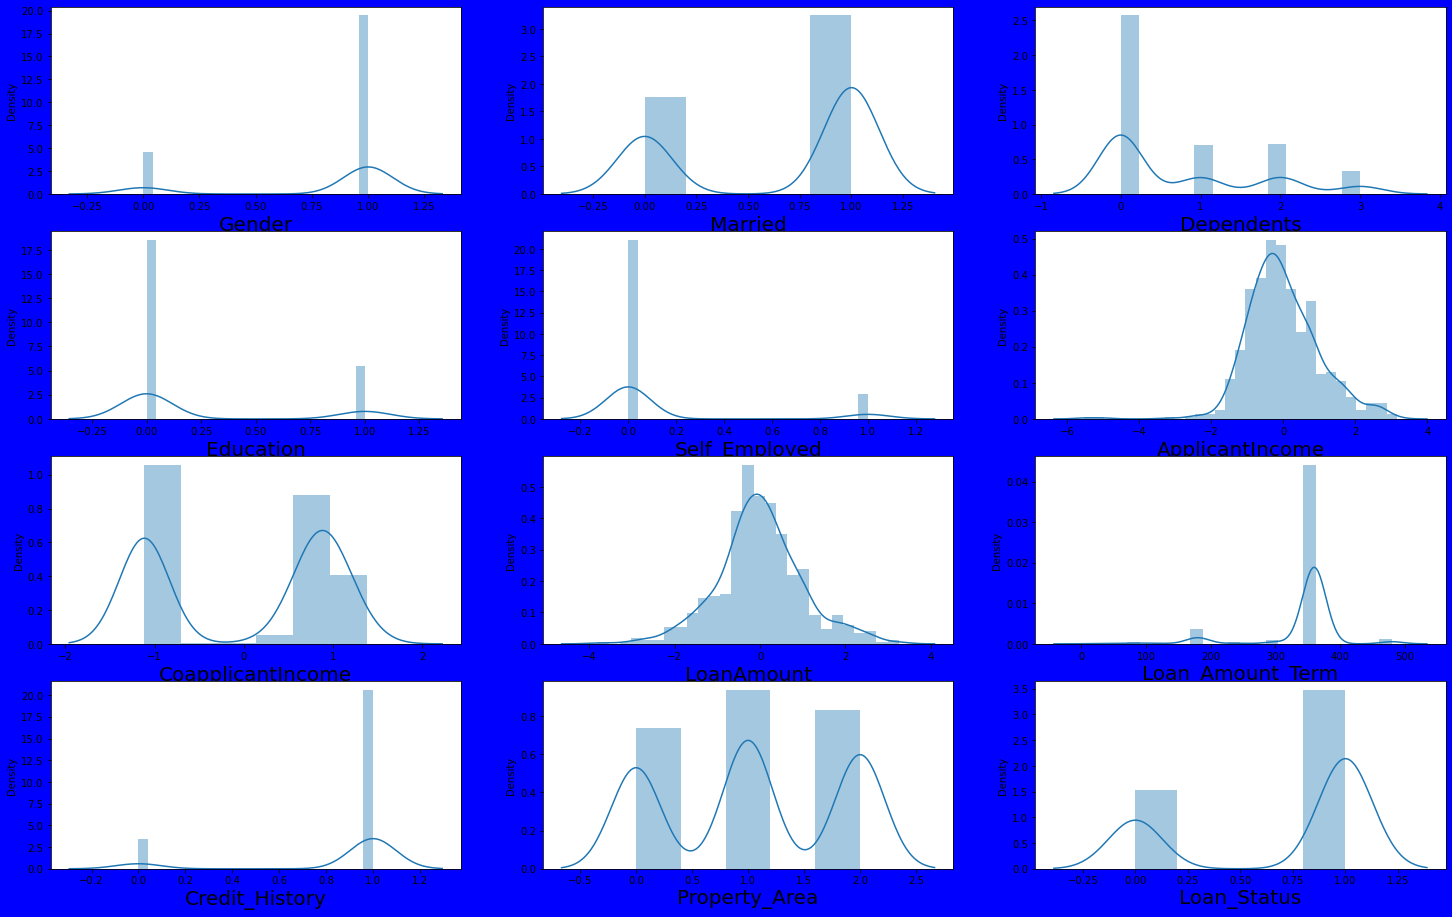

In [40]:
#for checking skewness
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
x= new_df.drop("Loan_Status",axis=1)
y = new_df["Loan_Status"]

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [43]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [44]:
pca = PCA(n_components=9)
new_data1 = pca.fit_transform(x_scaled)

In [45]:
new_data = pd.DataFrame(new_data1)

In [73]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size=0.30,random_state=50)

# LogisticRegression

In [74]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = lr.predict(x_test)

In [76]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.91      0.56      0.70        55
         1.0       0.83      0.97      0.90       119

    accuracy                           0.84       174
   macro avg       0.87      0.77      0.80       174
weighted avg       0.85      0.84      0.83       174



In [77]:
accuracy_score(y_test,y_pred)

0.8448275862068966

In [78]:
cross_val_score(lr,new_data,y,cv=5).mean()

0.8132383808095952

In [79]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 31  24]
 [  3 116]]


# BaggingClassifier

In [80]:
bag = BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [81]:
y_pred = bag.predict(x_test)

In [82]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        55
         1.0       0.84      0.84      0.84       119

    accuracy                           0.78       174
   macro avg       0.75      0.75      0.75       174
weighted avg       0.78      0.78      0.78       174



In [83]:
accuracy_score(y_test,y_pred)

0.7816091954022989

In [84]:
cross_val_score(bag,new_data,y,cv=5).mean()

0.7370464767616193

In [85]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 36  19]
 [ 19 100]]


# GradientBoostingClassifier

In [86]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
y_pred = gb.predict(x_test)

In [88]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.80      0.64      0.71        55
         1.0       0.85      0.92      0.88       119

    accuracy                           0.83       174
   macro avg       0.82      0.78      0.80       174
weighted avg       0.83      0.83      0.83       174



In [89]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [90]:
cross_val_score(gb,new_data,y,cv=5).mean()

0.7734032983508247

In [91]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 35  20]
 [  9 110]]


# XGBClassifier

In [92]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [93]:
y_pred = xgb.predict(x_test)

In [94]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        55
         1.0       0.84      0.87      0.86       119

    accuracy                           0.80       174
   macro avg       0.77      0.76      0.76       174
weighted avg       0.79      0.80      0.80       174



In [95]:
accuracy_score(y_test,y_pred)

0.7988505747126436

In [96]:
cross_val_score(xgb,new_data,y,cv=5).mean()

0.7647376311844077

In [97]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 35  20]
 [ 15 104]]


# LogisticRegression is my best model

In [113]:
#hyperparameter tuning
grid_params={"dual":[True,False],
            "C":[1,2,3,4],
            "intercept_scaling":[1,2,3,4],
            "warm_start":[True,False]}

In [114]:
grid_search = GridSearchCV(estimator = lr,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [115]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(C=1, warm_start=True),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4], 'dual': [True, False],
                         'intercept_scaling': [1, 2, 3, 4],
                         'warm_start': [True, False]})

In [116]:
grid_search.best_params_

{'C': 1, 'dual': False, 'intercept_scaling': 1, 'warm_start': True}

In [137]:
lr = LogisticRegression(C = 1, dual = False,intercept_scaling =1, warm_start=True)
lr.fit(x_train,y_train)

LogisticRegression(C=1, warm_start=True)

In [138]:
y_pred = lr.predict(x_test)

In [139]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.91      0.56      0.70        55
         1.0       0.83      0.97      0.90       119

    accuracy                           0.84       174
   macro avg       0.87      0.77      0.80       174
weighted avg       0.85      0.84      0.83       174



In [140]:
accuracy_score(y_test,y_pred)

0.8448275862068966

In [141]:
cross_val_score(lr,new_data,y,cv=5).mean()

0.8132383808095952

In [142]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 31  24]
 [  3 116]]


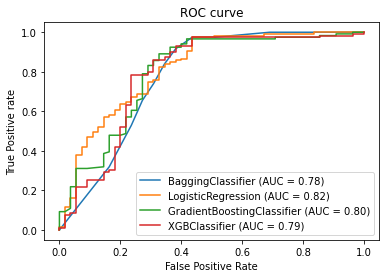

In [143]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(bag,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [145]:
import pickle
filename='loan.pk1'
pickle.dump(lr,open(filename,'wb'))